<a href="https://colab.research.google.com/github/Sarath-Mohan9469545/computing_lab_exp/blob/main/tsa_ma_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 5

!pip -q install yfinance
import yfinance as yf

     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 6.4 MB 29.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [91]:
import pandas as pd


In [92]:
IBEX = yf.Ticker("^IBEX")

IBEX_values = IBEX.history(start="2020-06-01")

In [93]:
IBEX_values

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-01,7228.700195,7276.000000,7160.100098,7221.399902,291929600,0,0
2020-06-02,7264.000000,7445.299805,7236.899902,7408.100098,402947100,0,0
2020-06-03,7487.299805,7629.700195,7448.899902,7626.399902,445036400,0,0
2020-06-04,7567.700195,7669.200195,7516.000000,7566.799805,514858000,0,0
2020-06-05,7672.000000,7890.399902,7664.100098,7872.600098,573283900,0,0
...,...,...,...,...,...,...,...
2022-05-30,8975.599609,8992.700195,8905.599609,8930.799805,159281100,0,0
2022-05-31,8898.799805,8922.799805,8836.900391,8851.500000,314821900,0,0
2022-06-01,8881.299805,8909.299805,8736.700195,8747.200195,163198400,0,0


In [94]:
import matplotlib.pyplot as plt


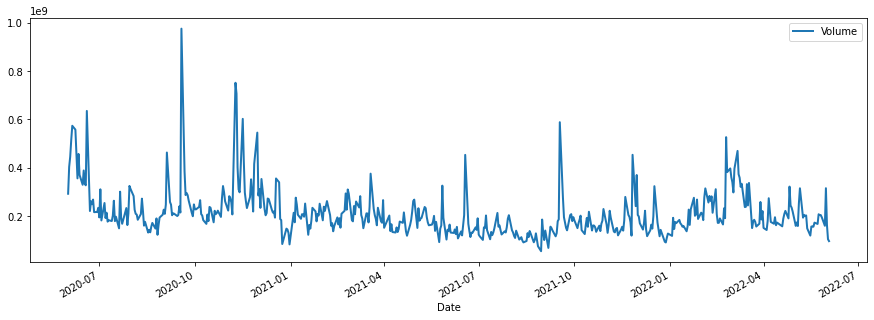

In [95]:
IBEX_values[['Volume']].plot(lw=2);

In [100]:
from statsmodels.tsa.stattools import adfuller
series = IBEX_values[["Volume"]].squeeze()
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.848308
p-value: 0.000000
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [101]:
result[1]

3.639305229148475e-07

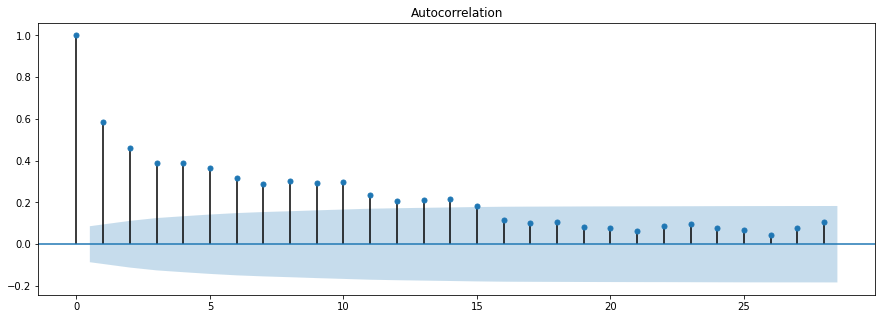

In [105]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(series)
plt.show()

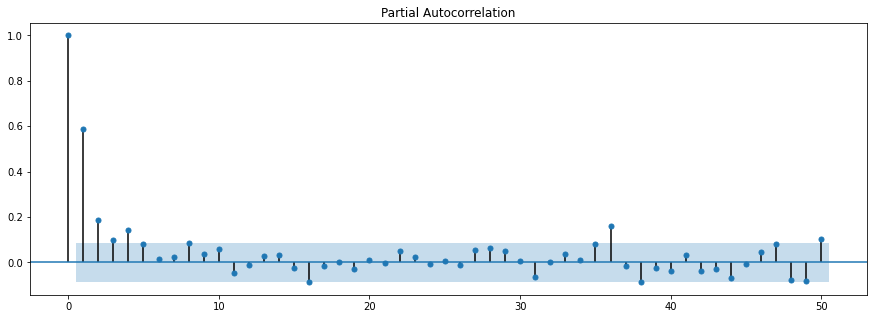

In [106]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(series, lags=50)
plt.show()

In [141]:
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
series
from statsmodels.tsa.arima_model import ARIMA
ARMA_model = ARIMA(endog=series, order=(0, 0, 15))
results = ARMA_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  517
Model:                    ARMA(0, 15)   Log Likelihood              -10106.156
Method:                       css-mle   S.D. of innovations       74619222.451
Date:                Sat, 04 Jun 2022   AIC                          20246.311
Time:                        18:55:07   BIC                          20318.528
Sample:                             0   HQIC                         20274.608
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.112e+08   1.18e+07     17.955      0.000    1.88e+08    2.34e+08
ma.L1.Volume      0.4138      0.044      9.433      0.000       0.328       0.500
ma.L2.Volume      0.2821      0.048     

In [142]:
pred=[]
pred = results.predict(0,517)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [143]:
pred

0      2.111851e+08
1      2.553387e+08
2      3.120502e+08
3      3.461761e+08
4      3.837585e+08
           ...     
513    1.828102e+08
514    2.419113e+08
515    1.933265e+08
516    1.548688e+08
517    1.620923e+08
Length: 518, dtype: float64

In [147]:
series

Date
2020-06-01    291929600
2020-06-02    402947100
2020-06-03    445036400
2020-06-04    514858000
2020-06-05    573283900
                ...    
2022-05-30    159281100
2022-05-31    314821900
2022-06-01    163198400
2022-06-02    103691200
2022-06-03     95868700
Name: Volume, Length: 517, dtype: int64

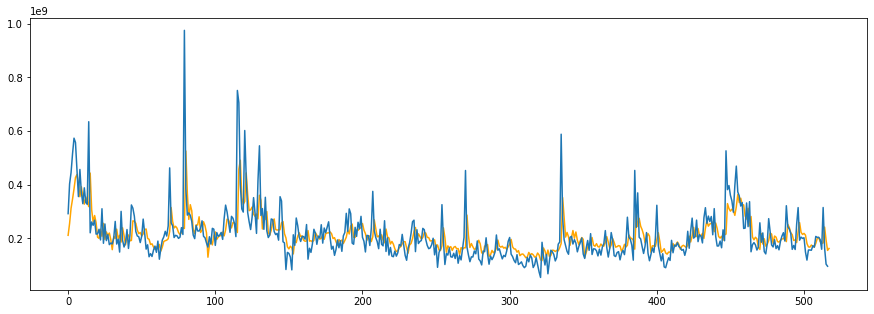

In [146]:
k=[j for j in pred]
plt.plot(k,color="orange")

p=[i for i in series]
plt.plot(p)
plt.show()

In [154]:
ARMA_model = ARIMA(endog=series[:500], order=(0, 0, 20))
results = ARMA_model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                 Volume   No. Observations:                  500
Model:                    ARMA(0, 20)   Log Likelihood               -9775.310
Method:                       css-mle   S.D. of innovations       74819755.681
Date:                Sat, 04 Jun 2022   AIC                          19594.620
Time:                        19:05:35   BIC                          19687.342
Sample:                             0   HQIC                         19631.004
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.125e+08   1.43e+07     14.913      0.000    1.85e+08     2.4e+08
ma.L1.Volume      0.4084      0.045      9.116      0.000       0.321       0.496
ma.L2.Volume      0.2754      0.049     

In [159]:
series

Date
2022-05-12    202060000
2022-05-13    148599600
2022-05-16    118777700
2022-05-17    156305200
2022-05-18    156404000
2022-05-19    155481600
2022-05-20    172383300
2022-05-23    166876400
2022-05-24    207033000
2022-05-25    203488200
2022-05-26    203819800
2022-05-27    194951400
2022-05-30    159281100
2022-05-31    314821900
2022-06-01    163198400
2022-06-02    103691200
2022-06-03     95868700
Name: Volume, dtype: int64

In [163]:
pred = results.predict(0,517)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


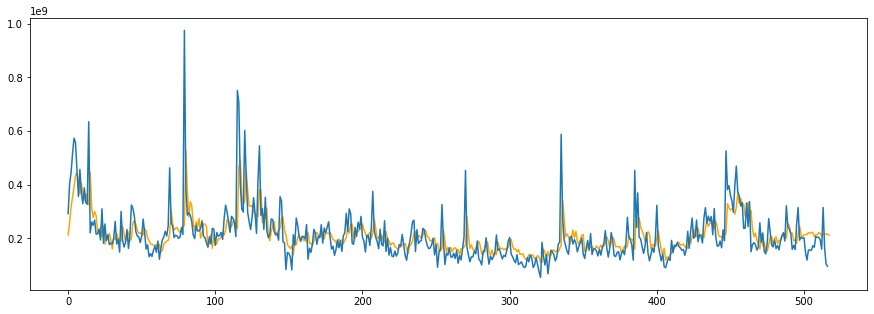

In [164]:
k=[j for j in pred]
plt.plot(k,color="orange")

p=[i for i in series]
plt.plot(p)
plt.show()

In [169]:

from sklearn.metrics import mean_squared_error
  


MSE = np.square(np.subtract(series[:500],pred[:500])).mean()


5621737957964484.0

In [170]:
data2=pd.read_csv("/content/a10.csv")


In [171]:
data2

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
...,...,...
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510


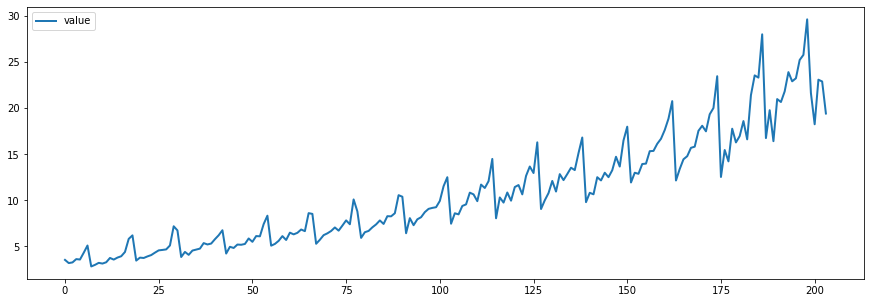

In [172]:
data2[['value']].plot(lw=2);

In [174]:
series2 = data2[["value"]].squeeze()
X = series2.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 3.145186
p-value: 1.000000
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


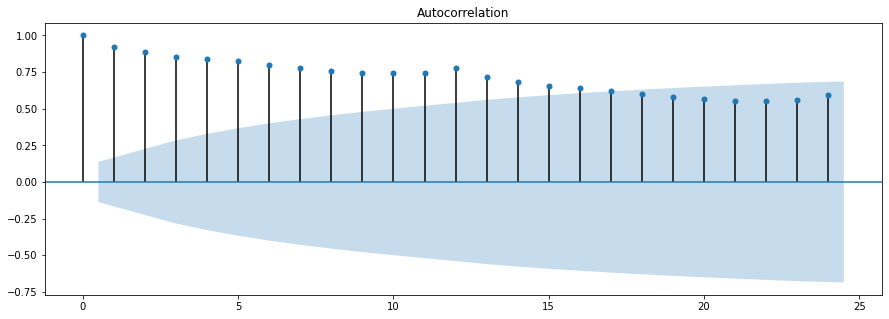

In [189]:
series2

0       3.526591
1       3.180891
2       3.252221
3       3.611003
4       3.565869
         ...    
199    21.654285
200    18.264945
201    23.107677
202    22.912510
203    19.431740
Name: value, Length: 204, dtype: float64

In [199]:
diff=series2.diff(1).fillna(0)

In [200]:
diff

0      0.000000
1     -0.345700
2      0.071330
3      0.358782
4     -0.045134
         ...   
199   -8.011071
200   -3.389340
201    4.842732
202   -0.195167
203   -3.480770
Name: value, Length: 204, dtype: float64

In [201]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.542662
p-value: 0.105436
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


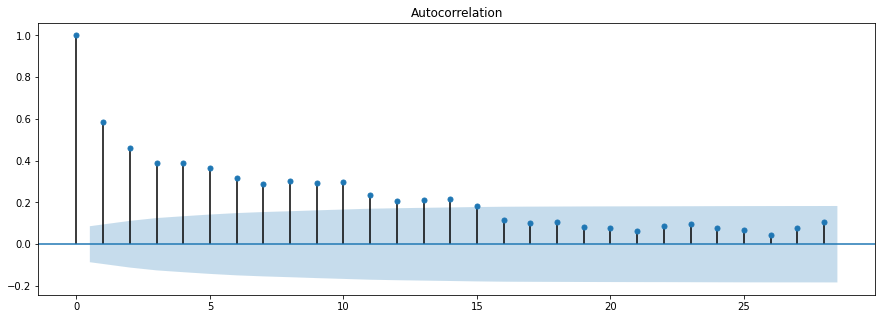

In [202]:
plot_acf(series)
plt.show()

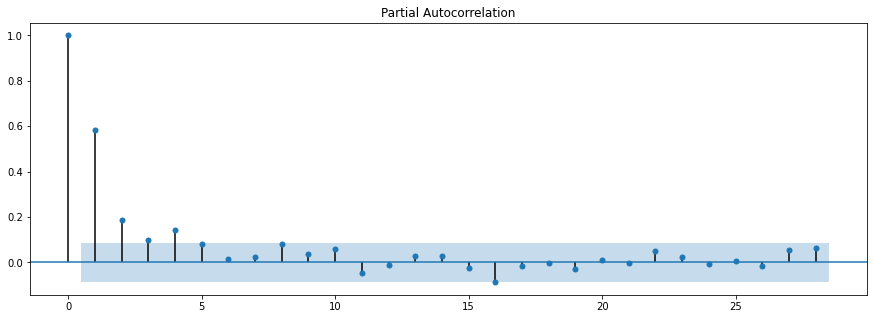

In [203]:
plot_pacf(series)
plt.show()

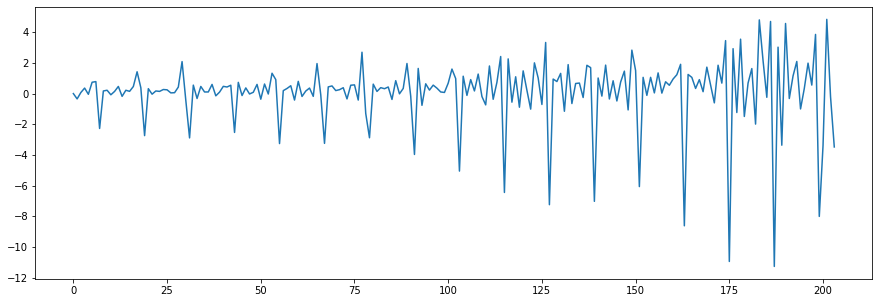

In [204]:
plt.plot(diff)
plt.show()

In [223]:
ARMA_model = ARIMA(endog=diff, order=(0, 0, 3))
results = ARMA_model.fit()
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                  204
Model:                     ARMA(0, 3)   Log Likelihood                -418.458
Method:                       css-mle   S.D. of innovations              1.876
Date:                Sat, 04 Jun 2022   AIC                            846.916
Time:                        19:35:38   BIC                            863.506
Sample:                             0   HQIC                           853.627
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0960      0.017      5.658      0.000       0.063       0.129
ma.L1.value    -0.6131      0.070     -8.804      0.000      -0.750      -0.477
ma.L2.value    -0.1000      0.083     -1.208    

In [224]:
pred = results.predict(0,203)

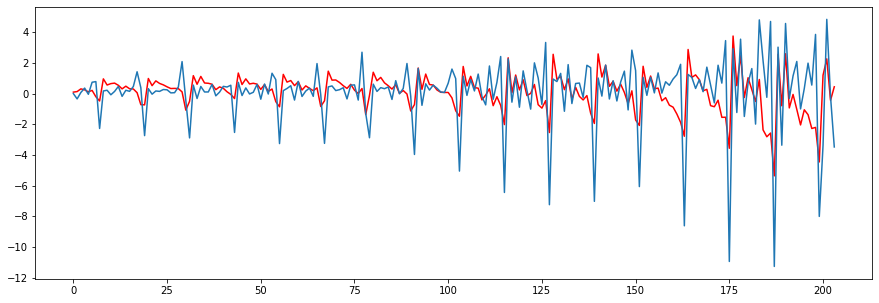

In [225]:

plt.plot(pred,color="red")
plt.plot(diff)
plt.show()